In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
from scipy.io import loadmat

In [3]:
VGG_MEAN = [103.939, 116.779, 123.68]
%cd ..

/home/chewing/Deep-Image-Analogy-TF


In [4]:
img=mpimg.imread('Hyperbole_1_sur_x.png') 

In [7]:
mat = loadmat('weights/imagenet-vgg-verydeep-19.mat')['layers']

convs = []
biases = []


for i in range(0,50):
   try:
       conv = mat[0][i][0][0][2][0][0]
       bias = mat[0][i][0][0][2][0][1]
       assert type(conv) is np.ndarray
       assert type(bias) is np.ndarray
       convs.append(conv)
       biases.append(bias)
   except:
       pass

In [35]:
def net(img):
        
    # Source: https://github.com/ry/tensorflow-vgg16/blob/master/vgg16.py#L5
    rgb_scaled = img * 255.0
    
    print (img.get_shape())

    # Convert RGB to BGR
    red, green, blue = tf.split(rgb_scaled, 3, 2)
    assert red.get_shape().as_list()[1:] == [224, 224, 1]
    assert green.get_shape().as_list()[1:] == [224, 224, 1]
    assert blue.get_shape().as_list()[1:] == [224, 224, 1]
    bgr = tf.concat(3, [
        blue - VGG_MEAN[0],
        green - VGG_MEAN[1],
        red - VGG_MEAN[2],
    ])

    with tf.variable_scope('vgg19'):
            
            with tf.variable_scope("layer1"):
                conv_1_1 = tf.layers.conv2d(inputs=img,filters=64,kernel_size=3,padding='SAME',name="conv_1_1",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[0],
                bias_initializer=biases[0])
                conv_1_2 = tf.layers.conv2d(inputs=conv_1_1,filters=64,kernel_size=3,padding='SAME',name="conv_1_2",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[1],
                bias_initializer=biases[1])
                mpool_1 = tf.nn.max_pool(inputs=conv_1_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='mpool_1')
                
            with tf.variable_scope("layer2"):
                conv_2_1 = tf.layers.conv2d(inputs=mpool_1,filters=128,kernel_size=3,padding='SAME',name="conv_2_1",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[2],
                bias_initializer=biases[2])
                conv_2_2 = tf.layers.conv2d(inputs=conv_2_1,filters=128,kernel_size=3,padding='SAME',name="conv_2_2",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[3],
                bias_initializer=biases[3])
                mpool_2 = tf.nn.max_pool(inputs=conv_2_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='mpool_2')

            with tf.variable_scope("layer3"):
                conv_3_1 = tf.layers.conv2d(inputs=mpool_2,filters=256,kernel_size=3,padding='SAME',name="conv_3_1",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[4],
                bias_initializer=biases[4])
                conv_3_2 = tf.layers.conv2d(inputs=conv_3_1,filters=256,kernel_size=3,padding='SAME',name="conv_3_2",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[5],
                bias_initializer=biases[5])
                conv_3_3 = tf.layers.conv2d(inputs=conv_3_2,filters=256,kernel_size=3,padding='SAME',name="conv_3_3",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[6],
                bias_initializer=biases[6])
                conv_3_4 = tf.layers.conv2d(inputs=conv_3_3,filters=256,kernel_size=3,padding='SAME',name="conv_3_4",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[7],
                bias_initializer=biases[7])
                mpool_3 = tf.nn.max_pool(inputs=conv_3_4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='mpool_3')

            with tf.variable_scope("layer4"):
                conv_4_1 = tf.layers.conv2d(inputs=mpool_3,filters=512,kernel_size=3,padding='SAME',name="conv_4_1",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[8],
                bias_initializer=biases[8])
                conv_4_2 = tf.layers.conv2d(inputs=conv_4_1,filters=512,kernel_size=3,padding='SAME',name="conv_4_2",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[9],
                bias_initializer=biases[9])
                conv_4_3 = tf.layers.conv2d(inputs=conv_4_2,filters=512,kernel_size=3,padding='SAME',name="conv_4_3",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[10],
                bias_initializer=biases[10])
                conv_4_4 = tf.layers.conv2d(inputs=conv_4_3,filters=512,kernel_size=3,padding='SAME',name="conv_4_4",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[11],
                bias_initializer=biases[11])
                mpool_4 = tf.nn.max_pool(inputs=conv_4_4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='mpool_4')

            with tf.variable_scope("layer5"):
                conv_5_1 = tf.layers.conv2d(inputs=mpool_4,filters=512,kernel_size=3,padding='SAME',name="conv_5_1",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[12],
                bias_initializer=biases[12])
                conv_5_2 = tf.layers.conv2d(inputs=conv_5_1,filters=512,kernel_size=3,padding='SAME',name="conv_5_2",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[13],
                bias_initializer=biases[13])
                conv_5_3 = tf.layers.conv2d(inputs=conv_5_2,filters=512,kernel_size=3,padding='SAME',name="conv_5_3",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[14],
                bias_initializer=biases[14])
                conv_5_4 = tf.layers.conv2d(inputs=conv_5_3,filters=512,kernel_size=3,padding='SAME',name="conv_5_4",activation=tf.nn.relu, use_bias='True', kernel_initializer=convs[15],
                bias_initializer=biases[15])

            return conv_5_4

In [36]:
test_img = tf.Variable(img, name='test_img')
Net = net(test_img)

(352, 352, 3)


ValueError: Dimension size, given by scalar input 3 must be in range [-3, 3) for 'split_12' (op: 'Split') with input shapes: [], [352,352,3] and with computed input tensors: input[0] = <3>.

In [35]:
def blend_features(feat_a, recon_feat_bb, alpha=0.8, tau=0.05, k=300.,clip_value=.05):
    def sigmoid(x):
        return 1. / (1. + np.exp(-x))
    
    def clip_at_threshold(neuron_mag_a,clip_value):
        neuron_mag_a[neuron_mag_a < clip_value] = 0
        return neuron_mag_a
    
    norm_feat_a = feat_a**2
    neuron_mag_a = (norm_feat_a - norm_feat_a.min(axis=(0,1),keepdims=True))/(norm_feat_a.max(axis=(0,1,2),keepdims=True)-norm_feat_a.min(axis=(0,1,2),keepdims=True))
#     neuron_mag_a = clip_at_threshold(neuron_mag_a,clip_value)
    neuron_mag_a = sigmoid(k*(neuron_mag_a - tau))
#     neuron_mag_a = clip_at_threshold(neuron_mag_a,clip_value)

    weight_a = alpha*neuron_mag_a
    feat_aa = np.multiply(feat_a, weight_a) + np.multiply(recon_feat_bb, (1. - weight_a))
    return feat_aa

def normalize_feat_map(feat_map):
    """
    Normalize the feature map along the channels dimension
    
    feat_map is a numpy array with channels along the 2nd dimension
    """
#     feat_map = (feat_map - feat_map.min(axis=(0,1),keepdims=True))/(feat_map.max(axis=(0,1,2),keepdims=True)-feat_map.min(axis=(0,1,2),keepdims=True))
    return feat_map/np.linalg.norm(feat_map,ord=2,axis=(2),keepdims=True)


In [21]:
# %pylab inline
# pylab.rcParams['figure.figsize'] = (6, 10)

## Defining the model from custom model class
The model class gives some extra functionality

In [69]:
c_feat_ids = [29,20,11,6,1]
c_alphas = [.8,.7,.6,.1]
c_patch_sizes = [3,3,3,5,5]
c_patch_radii = [500000,6,6,4,4]

c_iters = [500,500,500,500]

In [7]:
model = VGG19(use_cuda=True)

In [70]:
model.model

FeatureExtractor (
  (conv_1_1__0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_1_1__1): ReLU ()
  (conv_1_2__2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_1_2__3): ReLU ()
  (pool_1__4): AvgPool2d (size=(2, 2), stride=(2, 2), padding=0, ceil_mode=False, count_include_pad=True)
  (conv_2_1__5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_2_1__6): ReLU ()
  (conv_2_2__7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_2_2__8): ReLU ()
  (pool_2__9): AvgPool2d (size=(2, 2), stride=(2, 2), padding=0, ceil_mode=False, count_include_pad=True)
  (conv_3_1__10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_1__11): ReLU ()
  (conv_3_2__12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_2__13): ReLU ()
  (conv_3_3__14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu_3_3__15): ReLU ()

In [71]:
# model.model = model.model.cpu()

### Input Image Paths

In [168]:
imga_path = '../data/raw/ann.jpg'
imgbb_path = '../data/raw/anime3.jpg'

In [169]:
imga = Utils.load_image(img_path=imga_path,to_array=True,to_variable=True)
imgbb = Utils.load_image(img_path=imgbb_path,to_array=True,to_variable=True)

In [170]:
feata = model.get_features(img_tensor=imga)
featbb = model.get_features(img_tensor=imgbb)

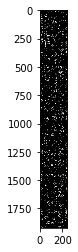

In [171]:
plt.imshow(Utils.get_viz_tensor(torch.from_numpy(feata[29].transpose(2,0,1))))

In [172]:
feat5a = feata[c_feat_ids[0]]
feat5bb = featbb[c_feat_ids[0]]

In [173]:
feat5a_norm = normalize_feat_map(feat5a)
feat5bb_norm = normalize_feat_map(feat5bb)

In [174]:
pm5ab = PatchMatchOrig(feat5a_norm,feat5a_norm,feat5bb_norm,feat5bb_norm, c_patch_sizes[0])
# plt.imshow(pm5ab.visualize())
pm5ab.propagate(iters=10,rand_search_radius=c_patch_radii[0])
# plt.imshow(pm5ab.visualize())

called


In [175]:
imga_raw = Utils.load_image(img_path=imga_path,to_array=False,to_variable=False).numpy().transpose(1,2,0)
imgbb_raw = Utils.load_image(img_path=imgbb_path,to_array=False,to_variable=False).numpy().transpose(1,2,0)
imga_raw.shape

(448, 448, 3)

In [176]:
feat5bb_norm.shape

(28, 28, 512)

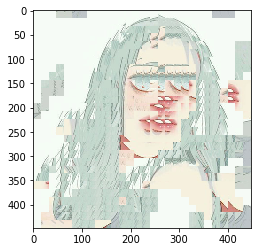

In [177]:
recon = pm5ab.reconstruct_image(imgbb_raw)
plt.imshow(Utils.deprocess_image(recon))

called


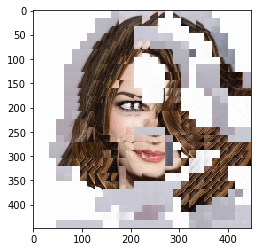

In [178]:
pm5ba = PatchMatchOrig(feat5bb_norm,feat5bb_norm,feat5a_norm,feat5a_norm,c_patch_sizes[0])
# plt.imshow(pm5ba.visualize()) # this will show the nnf for this block
pm5ba.propagate(iters=10,rand_search_radius=c_patch_radii[0])
# plt.imshow(pm5ba.visualize())
recon = pm5ba.reconstruct_image(imga_raw)
plt.imshow(Utils.deprocess_image(recon))

In [179]:
warped_feat5bb = pm5ab.reconstruct_image(feat5bb)
warped_feat5a = pm5ba.reconstruct_image(feat5a)

In [180]:
r4_bb = model.get_deconvoluted_feat(warped_feat5bb,5,iters=c_iters[0])
r4_a = model.get_deconvoluted_feat(warped_feat5a,5,iters=c_iters[0])

In [181]:
# model.model = model.model.cpu()
feat4a = feata[c_feat_ids[1]]
feat4bb = featbb[c_feat_ids[1]]

In [182]:
feat4aa = blend_features(feat4a,r4_bb,alpha=c_alphas[0])
feat4b =  blend_features(feat4bb,r4_a,alpha=c_alphas[0])

In [183]:
feat4a_norm = normalize_feat_map(feat4a)
feat4bb_norm = normalize_feat_map(feat4bb)

feat4aa_norm = normalize_feat_map(feat4aa)
feat4b_norm = normalize_feat_map(feat4b)

In [184]:
pm4ab = PatchMatchOrig(feat4a_norm,feat4aa_norm,feat4b_norm,feat4bb_norm, c_patch_sizes[1])
pm4ab.nnf = pm5ab.upsample_nnf(size=28*2).astype(np.int32)
pm4ab.propagate(iters=10,rand_search_radius=c_patch_radii[1])

called


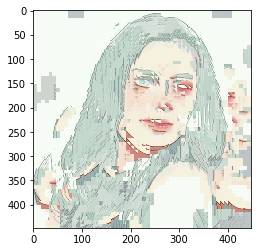

In [185]:
plt.imshow(Utils.deprocess_image(pm4ab.reconstruct_image(img_a=imgbb_raw)))

called


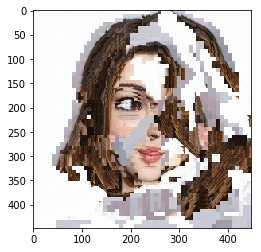

In [186]:
pm4ba = PatchMatchOrig(feat4bb_norm,feat4b_norm,feat4aa_norm,feat4a_norm, c_patch_sizes[1])
pm4ba.nnf = pm5ba.upsample_nnf(size=28*2).astype(np.int32)

pm4ba.propagate(iters=10,rand_search_radius=c_patch_radii[1])
plt.imshow(Utils.deprocess_image(pm4ba.reconstruct_image(img_a=imga_raw)))

In [187]:
warped_feat4bb = pm4ab.reconstruct_image(feat4bb)
warped_feat4a = pm4ba.reconstruct_image(feat4a)

r3_bb = model.get_deconvoluted_feat(warped_feat4bb,4,iters=c_iters[1])
r3_a = model.get_deconvoluted_feat(warped_feat4a,4,iters=c_iters[1])

In [188]:
# model.model = model.model.cpu()
feat3a = feata[c_feat_ids[2]]
feat3bb = featbb[c_feat_ids[2]]

In [189]:
feat3aa = blend_features(feat3a,r3_bb,alpha=c_alphas[1])
feat3b =  blend_features(feat3bb,r3_a,alpha=c_alphas[1])


In [190]:
feat3a_norm = normalize_feat_map(feat3a)
feat3bb_norm = normalize_feat_map(feat3bb)

feat3aa_norm = normalize_feat_map(feat3aa)
feat3b_norm = normalize_feat_map(feat3b)

In [191]:
pm3ab = PatchMatchOrig(feat3a_norm,feat3aa_norm,feat3b_norm,feat3bb_norm, c_patch_sizes[2])
pm3ab.nnf = pm4ab.upsample_nnf(size=56*2).astype(np.int32)

pm3ab.propagate(iters=10,rand_search_radius=c_patch_radii[2])

called


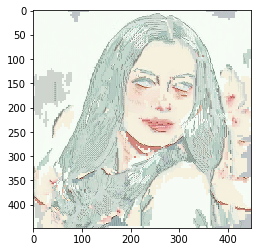

In [192]:
plt.imshow(Utils.deprocess_image(pm3ab.reconstruct_image(img_a=imgbb_raw)))

called


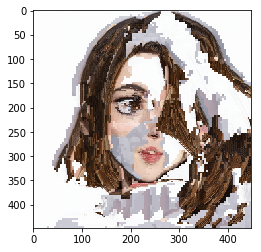

In [193]:
pm3ba = PatchMatchOrig(feat3bb_norm,feat3b_norm,feat3aa_norm,feat3a_norm, c_patch_sizes[2])
pm3ba.nnf = pm4ba.upsample_nnf(size=56*2).astype(np.int32)

pm3ba.propagate(iters=10,rand_search_radius=c_patch_radii[2])
plt.imshow(Utils.deprocess_image(pm3ba.reconstruct_image(img_a=imga_raw)))

In [194]:
warped_feat3bb = pm3ab.reconstruct_image(feat3bb)
warped_feat3a = pm3ba.reconstruct_image(feat3a)

r2_bb = model.get_deconvoluted_feat(warped_feat3bb,3,iters=c_iters[2])
r2_a = model.get_deconvoluted_feat(warped_feat3a,3,iters=c_iters[2])

In [195]:
# model.model = model.model.cpu()
feat2a = feata[c_feat_ids[3]]
feat2bb = featbb[c_feat_ids[3]]

In [196]:
feat2aa = blend_features(feat2a,r2_bb,alpha=c_alphas[2])
feat2b = blend_features(feat2bb,r2_a,alpha=c_alphas[2])


In [197]:
feat2a_norm = normalize_feat_map(feat2a)
feat2bb_norm = normalize_feat_map(feat2bb)

feat2aa_norm = normalize_feat_map(feat2aa)
feat2b_norm = normalize_feat_map(feat2b)

In [198]:
pm2ab = PatchMatchOrig(feat2a_norm,feat2aa_norm,feat2b_norm,feat2bb_norm, c_patch_sizes[3])
pm2ab.nnf = pm3ab.upsample_nnf(size=112*2).astype(np.int32)

pm2ab.propagate(iters=10,rand_search_radius=c_patch_radii[3])

called


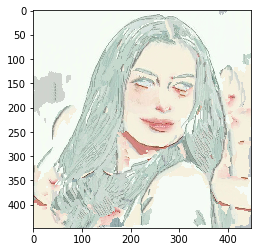

In [199]:
plt.imshow(Utils.deprocess_image(pm2ab.reconstruct_image(img_a=imgbb_raw)))

called


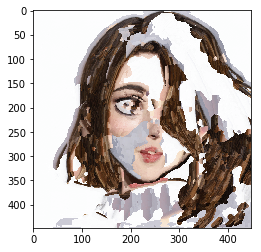

In [200]:
pm2ba = PatchMatchOrig(feat2bb_norm,feat2b_norm,feat2aa_norm,feat2a_norm, c_patch_sizes[3])
pm2ba.nnf = pm3ba.upsample_nnf(size=112*2).astype(np.int32)

pm2ba.propagate(iters=10,rand_search_radius=c_patch_radii[3])
plt.imshow(Utils.deprocess_image(pm2ba.reconstruct_image(img_a=imga_raw)))

In [201]:
warped_feat2bb = pm2ab.reconstruct_image(feat2bb)
warped_feat2a = pm2ba.reconstruct_image(feat2a)

r1_bb = model.get_deconvoluted_feat(warped_feat2bb,2,iters=c_iters[3])
r1_a = model.get_deconvoluted_feat(warped_feat2a,2,iters=c_iters[3])

In [202]:
# model.model = model.model.cpu()
feat1a = feata[c_feat_ids[4]]
feat1bb = featbb[c_feat_ids[4]]

In [203]:
feat1aa = blend_features(feat1a,r1_bb,alpha=c_alphas[3])
feat1b = blend_features(feat1bb,r1_a,alpha=c_alphas[3])

In [ ]:
feat1a_norm = normalize_feat_map(feat1a)
feat1bb_norm = normalize_feat_map(feat1bb)
 
feat1aa_norm = normalize_feat_map(feat1aa)
feat1b_norm = normalize_feat_map(feat1b)

In [ ]:
pm1ab = PatchMatchOrig(feat1a_norm,feat1aa_norm,feat1b_norm,feat1bb_norm, c_patch_sizes[4])
pm1ab.nnf = pm2ab.upsample_nnf(size=224*2).astype(np.int32)
pm1ab.propagate(iters=10,rand_search_radius=c_patch_radii[4])

called


In [ ]:
plt.axis('off')
plt.imshow(Utils.deprocess_image(pm1ab.reconstruct_image(img_a=imgbb_raw)))

In [ ]:
pm1ba = PatchMatchOrig(feat1bb_norm,feat1b_norm,feat1aa_norm,feat1a_norm, c_patch_sizes[4])
pm1ba.nnf = pm2ba.upsample_nnf(size=224*2).astype(np.int32)

pm1ba.propagate(iters=10,rand_search_radius=c_patch_radii[4])

In [ ]:
plt.axis('off')
plt.imshow(Utils.deprocess_image(pm1ba.reconstruct_image(img_a=imga_raw)))

In [ ]:
ups = pm2ba.upsample_nnf(size=224*2)
plt.axis('off')
resB = np.clip(Utils.deprocess_image(pm1ab.reconstruct_avg(imgbb_raw,patch_size=5)),0,1)

plt.imshow(resB)
plt.imsave('/tmp/mona.png',resB)

In [ ]:
plt.axis('off')
resAA = np.clip(Utils.deprocess_image(pm1ba.reconstruct_avg(imga_raw,patch_size=2)),0,1)
plt.imshow(resAA)
plt.imsave('/tmp/ava.png',resAA)

In [ ]:
plt.imshow(pm1ab.visualize())

In [ ]:
plt.imshow(pm1ba.visualize())

In [ ]:
plt.imsave('../data/outputs/hut_AA.jpg',resAA)

In [ ]:
plt.imsave('/tmp/trump.png',resAA)

In [ ]:
ups = pm1ba.upsample_nnf(size=448)
plt.axis('off')
resAA = np.clip(Utils.deprocess_image(pm1ba.reconstruct_avg(imga_raw,patch_size=2)),0,1)
plt.imshow(resB)